# Домашнее задание к семинару 06 (HW06)

Тема: деревья решений и ансамбли (bagging / random forest / boosting / stacking) и честный ML-эксперимент.

HW06 относится к семинару **S06** и выполняется в личном репозитории студента (на основе шаблона курса) в папке `homeworks/HW06/`.

---

## 1. Цель

Закрепить:

- понимание того, как работает **дерево решений** и почему оно легко переобучается;
- навыки контроля сложности дерева (например, через `max_depth`, `min_samples_leaf`, `ccp_alpha`);
- практическое понимание ансамблей:
  - **bagging** как способ уменьшить variance;
  - **Random Forest** как bagging деревьев + случайность по признакам;
  - **boosting** как последовательное улучшение модели;
  - (опционально) **stacking** как композиция разных моделей через метамодель;
- постановку **честного ML-эксперимента**: фиксированный train/test, CV на train для подбора гиперпараметров, единые метрики, фиксация артефактов;
- аккуратное оформление результата в виде ноутбука + короткого отчёта.

---

## 2. Задание

### 2.1. Структура для HW06 (обязательно)

1) В корне репозитория должна быть папка `homeworks/` (создать, если её ещё нет).  
2) Внутри `homeworks/` создать папку `HW06/`.  
3) В папке `homeworks/HW06/` создать:

- основной ноутбук: `HW06.ipynb`
- отчёт: `report.md`
- папку для артефактов: `artifacts/`
  - рекомендуется внутри `artifacts/` завести подпапку `figures/` для графиков

> Имена папок и файлов должны быть **строго такими**, как указано (регистр важен).

---

### 2.2. Учебные датасеты S06 (выбрать один из четырёх)

Для HW06 предоставлены **4 CSV-файла** на выбор:

- `S06-hw-dataset-02.csv` – бинарная классификация, более "сложная": больше шума/перекрытия классов, плюс добавлены несколько явно нелинейных взаимодействий признаков.  
  Обычно это хороший вариант, чтобы увидеть, как ансамбли выигрывают у базовых моделей.

Все данные **полностью синтетические** и не описывают реальных людей или реальные события.

Рекомендации по размещению:

- CSV-файл(ы) можно положить в `homeworks/HW06/` (или в любую другую осмысленную папку данных);
- в ноутбуке путь к CSV должен быть **относительным** (без абсолютных путей к домашним каталогам).

---

### 2.3. Содержание ноутбука `HW06.ipynb` (основная часть)

В ноутбуке `homeworks/HW06/HW06.ipynb` необходимо выполнить следующие шаги.

#### 2.3.1. Загрузка данных и первичный анализ

1) Импортировать библиотеки: `pandas`, `numpy`, `scikit-learn` (модели, CV, метрики), `matplotlib` (для графиков).  
2) Загрузить выбранный CSV в `pandas.DataFrame`.  
3) Зафиксировать минимум:

   - `head()`, `info()`, базовые статистики (`describe()` или аналог);
   - распределение таргета `target` (доли классов);
   - (желательно) проверку пропусков и типы столбцов.

4) Определить:

   - `X` – признаки (все столбцы, кроме `target`; столбец `id` не использовать как признак);
   - `y` – таргет (`target`).

#### 2.3.2. Train/Test-сплит и воспроизводимость

1) Разделить данные на train/test:

   - `test_size` разумный (например, 0.2 или 0.25);
   - обязательно фиксировать `random_state` (например, 42);
   - для классификации – использовать `stratify=y`.

2) Коротко пояснить, почему фиксированный seed и стратификация важны.

#### 2.3.3. Baseline’ы

Сделать минимум два baseline’а:

1) `DummyClassifier` (например, `most_frequent` или `stratified`).  
2) `LogisticRegression` (желательно через `Pipeline(StandardScaler + LogisticRegression)`).

Для обоих baseline’ов посчитать метрики на test (см. ниже) и кратко интерпретировать.

#### 2.3.4. Модели недели 6 (обязательно)

Реализовать и сравнить минимум 3 модели недели 6 (рекомендуется 4):

- `DecisionTreeClassifier`  
  Обязательно показать **контроль сложности** (например, `max_depth` + `min_samples_leaf`; или `ccp_alpha`).

- `RandomForestClassifier`  
  Желательно посмотреть хотя бы одну из "лесных" ручек (`max_features`, `min_samples_leaf`, `max_depth`).

- Один boosting на выбор:
  - `AdaBoostClassifier` или
  - `GradientBoostingClassifier` или
  - `HistGradientBoostingClassifier`

- (опционально) `StackingClassifier` (2-3 базовых модели + метамодель).  
  Важно: делать стекинг **корректно** (через CV-логику; `StackingClassifier` в sklearn это делает).

Подбор гиперпараметров:

- выполнять **только на train** через CV (`GridSearchCV` или аккуратный перебор);
- test использовать **один раз** для финальной оценки.

#### 2.3.5. Метрики качества (обязательно)

Минимальный набор:

- `accuracy` – всегда
- `f1`:
  - для бинарной классификации: обычный `f1`
  - для мультикласса (`S06-hw-dataset-03.csv`): `f1_macro` (или явно пояснить выбранный вариант)
- `ROC-AUC`:
  - обязательно для бинарных датасетов (если модель даёт вероятности)
  - для мультикласса можно:
    - либо не считать ROC-AUC (и явно написать почему),
    - либо посчитать multi-class AUC (например, OVR) и объяснить.

Рекомендуемые диагностические графики:

- ROC-кривая (для бинарных задач);
- confusion matrix;
- (по желанию для дисбаланса, особенно dataset-04) PR-кривая.

#### 2.3.6. Интерпретация (обязательно)

Для **лучшей модели** (по согласованному критерию – например, ROC-AUC на бинарных задачах или `f1_macro` на мультиклассе):

- посчитать **permutation importance** (top-10/15 признаков);
- кратко интерпретировать: какие признаки влияют сильнее и насколько это похоже на ожидания по данным.

---

### 2.4. Артефакты эксперимента (обязательно)

В папке `homeworks/HW06/artifacts/` должны быть:

- `metrics_test.json` (или `.csv`) – финальные метрики на test по всем моделям;
- `search_summaries.json` – лучшие параметры и CV-score для тех моделей, где был подбор;
- `best_model.joblib` – сохранённая лучшая модель;
- `best_model_meta.json` – метаданные: какая модель лучшая, какими параметрами, какие метрики на test;
- `figures/` – минимум 2 изображения (например, ROC/PR + confusion matrix или importance).

---

### 2.5. Отчёт `report.md` (обязательно)

1) В материалах семинара будет шаблон: `S06-hw-report-template.md`.  
2) Нужно создать файл `homeworks/HW06/report.md` и заполнить его **по шаблону**.

Важно:

- не меняйте названия разделов (заголовков) в отчёте;
- вставляйте результаты и выводы в соответствующие секции.

---

## 3. Требования к структуре и именованию (итог)

К дедлайну в репозитории должно быть:

- `homeworks/HW06/HW06.ipynb`
- `homeworks/HW06/report.md`
- `homeworks/HW06/artifacts/` (см. состав выше)

Требования:

- названия папок и файлов – строго как указано;
- путь к CSV – относительный;
- ноутбук выполняется **без ошибок** при последовательном запуске всех ячеек;
- результаты эксперимента оформлены: метрики, сравнение моделей, выводы.

---

## 4. Критерии зачёта

HW06 считается зачтённым, если:

1) Соблюдена структура `homeworks/HW06/` и нейминг файлов.

2) В `HW06.ipynb` есть:

   - загрузка выбранного `S06-hw-dataset-0X.csv`;
   - базовый EDA и анализ баланса классов;
   - train/test-сплит с `random_state` и `stratify`;
   - baseline: Dummy + LogisticRegression;
   - минимум 3 модели недели 6 (дерево + лес + boosting), с подбором параметров на train через CV;
   - честная финальная оценка на test по согласованным метрикам;
   - интерпретация лучшей модели (permutation importance) + текстовые выводы.

3) В `artifacts/` лежат требуемые файлы и минимум 2 графика в `figures/`.

4) Заполнен `report.md` по шаблону.

---

## 5. Опциональная часть (для желающих)

Не обязательна для зачёта, но приветствуется:

- проверка **устойчивости**: несколько прогонов (например, 5 разных `random_state`) и анализ разброса метрик;
- PR-кривая и `average_precision_score` для датасета-04 (дисбаланс);
- калибровка вероятностей (`CalibratedClassifierCV`) и сравнение;
- сравнение времени обучения/инференса моделей.

---

## 6. Сроки и порядок сдачи

- Работа выполняется **индивидуально**.
- Дедлайн объявляется преподавателем отдельно.
- Факт сдачи: к дедлайну в репозитории есть `homeworks/HW06/` со всеми файлами и корректно выполненным ноутбуком.


### 2.3.1. Загрузка данных и первичный анализ

In [103]:
# Импорты и базовые настройки эксперимента.

# - Фиксируем RANDOM_STATE, чтобы случайные компоненты были воспроизводимыми.
# - Создаём папку artifacts/ – туда будем складывать результаты и модель.

from __future__ import annotations

import json
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,
    roc_curve, precision_recall_curve, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.inspection import permutation_importance

import joblib

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


In [128]:
# Вспомогательные функции для эксперимента.

# Здесь нет “обучения” – только сервисные вещи:
# - compute_metrics: считает метрики (accuracy, F1, ROC-AUC при наличии вероятностей)
# - evaluate_on_test: единообразная оценка модели на тесте
# - save_json: аккуратное сохранение артефактов
# - plot_confusion / plot_roc: быстрая диагностика качества

from sklearn.metrics import RocCurveDisplay

def compute_metrics(y_true, y_pred, y_proba=None) -> dict:
    m = {
        "accuracy": float(accuracy_score(y_true, y_pred)),
        "f1": float(f1_score(y_true, y_pred)),
    }
    if y_proba is not None:
        try:
            m["roc_auc"] = float(roc_auc_score(y_true, y_proba))
        except Exception:
            m["roc_auc"] = None
    else:
        m["roc_auc"] = None
    return m

def evaluate_on_test(model, X_test, y_test, label: str) -> dict:
    pred = model.predict(X_test)
    proba = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)[:, 1]
    metrics = compute_metrics(y_test, pred, proba)
    metrics["model"] = label
    return metrics

def save_json(obj: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    with path.open("w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)

def plot_confusion(y_true, y_pred, title: str):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("pred")
    plt.ylabel("true")
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    for (i, j), v in np.ndenumerate(cm):
        plt.text(j, i, str(v), ha="center", va="center")
    plt.savefig("artifacts/figures/confusion_matrix.png", dpi=500, bbox_inches="tight")
    plt.show()

def plot_roc(model, X_test, y_test, title: str):
    if not hasattr(model, "predict_proba"):
        print("ROC: модель не поддерживает predict_proba")
        return
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title(title)
    plt.savefig("artifacts/figures/roc_curve.png", dpi=500, bbox_inches="tight")
    plt.show()

In [105]:
# Загрузка датасета
df = pd.read_csv("S06-hw-dataset-02.csv")
print("Shape:", df.shape)
df.head()

Shape: (18000, 39)


,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


In [106]:
# Информация о столбцах и типах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

In [107]:
# Описательная статистика
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


In [108]:
# Типы + пропуски + уникальные
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "missing": df.isna().sum(),
    "missing_%": (df.isna().sum() / len(df) * 100).round(2),
    "n_unique": df.nunique(dropna=False)
}).sort_values(["missing", "n_unique"], ascending=False)

summary

,dtype,missing,missing_%,n_unique
id,int64,0,0.0,18000
f01,float64,0,0.0,18000
f02,float64,0,0.0,18000
f03,float64,0,0.0,18000
f04,float64,0,0.0,18000
f05,float64,0,0.0,18000
f06,float64,0,0.0,18000
f07,float64,0,0.0,18000
f08,float64,0,0.0,18000
f09,float64,0,0.0,18000


In [109]:
# Распределение таргета (доли классов)
TARGET_COL = "target"

print("\n--- TARGET COUNTS ---")
print(df[TARGET_COL].value_counts(dropna=False))

print("\n--- TARGET SHARE ---")
print(df[TARGET_COL].value_counts(normalize=True, dropna=False))


--- TARGET COUNTS ---
target
0    13273
1     4727
Name: count, dtype: int64

--- TARGET SHARE ---
target
0    0.737389
1    0.262611
Name: proportion, dtype: float64


In [110]:
TARGET = "target"
ID = "id"

y = df[TARGET].astype(int)
X = df.drop(columns=[TARGET, ID])

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (18000, 37)
y shape: (18000,)


#### 2.3.2. Train/Test-сплит и воспроизводимость

In [111]:
# Загрузка датасета и фиксированное разбиение train/test.

# - stratify=y сохраняет пропорции классов в train и test
# - random_state фиксирует случайность разбиения

RANDOM_STATE = 42
TEST_SIZE = 0.2  # можно 0.25

# X — признаки, y — таргет (у тебя уже должны быть определены)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Target share train:", y_train.value_counts(normalize=True).round(4).to_dict())
print("Target share test :", y_test.value_counts(normalize=True).round(4).to_dict())

X_train.shape, X_test.shape

Train: (14400, 37) Test: (3600, 37)
Target share train: {0: 0.7374, 1: 0.2626}
Target share test : {0: 0.7375, 1: 0.2625}


((14400, 37), (3600, 37))

**Фиксированный** `random_state` **(seed)** нужен для воспроизводимости: разбиение на train/test случайное, и без seed при каждом запуске будут разные выборки → качество модели будет меняться, сравнивать модели нечестно, результаты нельзя повторить.

`stratify=y` важно в классификации, особенно при дисбалансе классов: стратификация делает так, чтобы доли классов в train и test были примерно одинаковыми (как в исходных данных). Без неё может случайно получиться, что в test мало объектов редкого класса — метрики станут нестабильными и оценка качества будет некорректной.

#### 2.3.3. Baseline’ы

Baseline – это “точка отсчёта”. Если модель недели 6 не обгоняет baseline, то:

- либо она действительно не подходит под задачу,
- либо вы неправильно настроили эксперимент (например, переобучили/недообучили).

Здесь два baseline’а:

1) `DummyClassifier(most_frequent)` – простейшая нижняя планка (угадываем самый частый класс).  
2) `LogisticRegression` – сильный и быстрый baseline из прошлой недели (линейная модель + нормировка признаков).

Для `LogisticRegression` сделаем небольшой **подбор гиперпараметра `C`** на `train` через CV.

In [112]:
# Baseline'ы и подготовка контейнеров для результатов.

# - results: список словарей с метриками на тесте
# - best_models: сюда складываем обученные лучшие модели (чтобы потом их диагностировать/сохранить)
# - search_summaries: сюда складываем лучшие параметры подбора и CV-оценку

# CV = кросс-валидация на train: нужна для подбора гиперпараметров без доступа к тесту.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

results = []
best_models = {}  # label -> fitted best estimator
search_summaries = {}  # label -> краткая инфа о подборе

# 1) Baseline: DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)

results.append(evaluate_on_test(dummy, X_test, y_test, "Dummy(most_frequent)"))
best_models["Dummy(most_frequent)"] = dummy

results

[{'accuracy': 0.7375,
  'f1': 0.0,
  'roc_auc': 0.5,
  'model': 'Dummy(most_frequent)'}]

In [113]:
# 2) LogisticRegression baseline (с минимальным подбором)

# Логрегрессия почти всегда требует масштабирования признаков, поэтому используем Pipeline со StandardScaler.
lr = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=4000, random_state=RANDOM_STATE))
])

# Подбираем C (обратная сила регуляризации): меньше C -> сильнее регуляризация -> проще модель.
lr_grid = {
    "lr__C": [0.1, 1.0, 10.0],
    "lr__solver": ["lbfgs"]
}

# GridSearchCV перебирает сетку параметров и оценивает качество по CV. scoring=roc_auc – метрика для бинарной классификации по вероятностям.
lr_search = GridSearchCV(
    estimator=lr,
    param_grid=lr_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    refit=True,
    return_train_score=True
)

lr_search.fit(X_train, y_train)

best_lr = lr_search.best_estimator_
best_models["LogReg(scaled)"] = best_lr

search_summaries["LogReg(scaled)"] = {
    "best_params": lr_search.best_params_,
    "best_cv_roc_auc": float(lr_search.best_score_)
}

results.append(evaluate_on_test(best_lr, X_test, y_test, "LogReg(scaled)"))

search_summaries["LogReg(scaled)"]


{'best_params': {'lr__C': 10.0, 'lr__solver': 'lbfgs'},
 'best_cv_roc_auc': 0.8034441518518427}

In [114]:
results_df = pd.DataFrame(results).set_index("model")
display(results_df.sort_values("roc_auc", ascending=False))

,accuracy,f1,roc_auc
model,,,
LogReg(scaled),0.811944,0.560675,0.797692
Dummy(most_frequent),0.737500,0.000000,0.500000


#### 2.3.4. Модели недели 6 (обязательно)

Cравним 4 семейства моделей:

- **Decision Tree** – простая нелинейность, быстро обучается, легко переобучается без ограничений.
- **Random Forest** – ансамбль деревьев, обычно устойчивее и сильнее одного дерева.
- **HistGradientBoosting** – градиентный бустинг (часто даёт высокое качество на табличных данных).
- **StackingClassifier** - это ансамбль “разных” моделей, где поверх их предсказаний обучается метамодель (здесь – логистическая регрессия).

Протокол подбора:

- гиперпараметры подбираем через `GridSearchCV` **только на train**;
- метрику для подбора берём `roc_auc` (она хорошо работает для бинарной классификации, когда важна “сортировка” вероятностей);
- тест используем **ровно один раз** – для финальной честной оценки лучших моделей.

In [115]:
# Единая функция для подбора гиперпараметров через GridSearchCV.

# Она:
# - обучает GridSearchCV на X_train/y_train
# - кладёт лучшую модель и summary в словари
# - добавляет финальную оценку на тесте в results

def run_search(label: str, estimator, param_grid: dict):
    search = GridSearchCV(
        estimator,
        param_grid,
        scoring="roc_auc",
        cv=cv,
        n_jobs=-1,
        refit=True,
        return_train_score=True
    )
    search.fit(X_train, y_train)

    best = search.best_estimator_
    best_models[label] = best
    search_summaries[label] = {
        "best_params": search.best_params_,
        "best_cv_roc_auc": float(search.best_score_),
    }
    results.append(evaluate_on_test(best, X_test, y_test, label))
    return search

In [116]:
# Decision Tree: одна модель дерева решений.

# Что обычно делает дерево “сложнее” и склоннее к переобучению:
# - большой max_depth
# - маленький min_samples_leaf
# ccp_alpha – параметр cost-complexity pruning (штраф за сложность).

# 3.1 Decision Tree
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

dt_grid = {
    "max_depth": [None, 3, 5, 8],
    "min_samples_leaf": [1, 5, 10, 20],
    "ccp_alpha": [0.0, 0.001, 0.005, 0.01],
}

dt_search = run_search("DecisionTree", dt, dt_grid)
search_summaries["DecisionTree"]

{'best_params': {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 20},
 'best_cv_roc_auc': 0.832679546323889}

In [117]:
# Random Forest: ансамбль деревьев (bagging).

# Идеи:
# - много деревьев (n_estimators) снижает дисперсию
# - max_features добавляет разнообразие деревьев (важно для ансамблей)
# - ограничения глубины/листа помогают контролировать переобучение

# Random Forest
rf = RandomForestClassifier(
    n_estimators=600,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    oob_score=False
)

rf_grid = {
    "max_depth": [None, 6, 10],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", 0.5],
}

rf_search = run_search("RandomForest", rf, rf_grid)
search_summaries["RandomForest"]

{'best_params': {'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1},
 'best_cv_roc_auc': 0.9293180991790246}

In [118]:
# HistGradientBoosting: градиентный бустинг по гистограммам (быстро и часто качественно).

# Ключевые “ручки”:
# - learning_rate: шаг обучения (меньше -> аккуратнее, часто нужно больше итераций)
# - max_depth / max_leaf_nodes: сложность базовых деревьев
# early_stopping=True включает остановку по внутренней валидации на train.

# HistGradientBoosting (быстрый градиентный бустинг в sklearn)
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(
    random_state=RANDOM_STATE,
    early_stopping=True
)

hgb_grid = {
    "learning_rate": [0.03, 0.05, 0.1],
    "max_depth": [2, 3, None],
    "max_leaf_nodes": [15, 31, 63],
}

hgb_search = run_search("HistGradientBoosting", hgb, hgb_grid)
search_summaries["HistGradientBoosting"]

{'best_params': {'learning_rate': 0.05,
  'max_depth': None,
  'max_leaf_nodes': 63},
 'best_cv_roc_auc': 0.9316701338860615}

In [119]:
# Stacking (опционально): ансамбль из нескольких уже обученных моделей + метамодель.

# - estimators: базовые модели (их предсказания идут на вход метамодели)
# - final_estimator: метамодель (здесь логистическая регрессия)
# - cv=5: CV внутри стекинга, чтобы метамодель училась без утечки

# базовые модели (лучше простые и разные)
stack = StackingClassifier(
    estimators=[
        ("dt", DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=5, min_samples_leaf=10)),
        ("rf", RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=400, n_jobs=-1)),
        ("hgb", HistGradientBoostingClassifier(random_state=RANDOM_STATE)),
    ],
    final_estimator=LogisticRegression(max_iter=3000, random_state=RANDOM_STATE),
    cv=cv,
    stack_method="predict_proba",
    n_jobs=-1
)

stack_grid = {
    "final_estimator__C": [0.1, 1.0, 10.0]
}

stack_search = run_search("Stacking", stack, stack_grid)
search_summaries["Stacking"]

{'best_params': {'final_estimator__C': 1.0},
 'best_cv_roc_auc': 0.9326639485027901}

In [120]:
# Сводная таблица результатов на тесте и лучшей CV-оценки.

cv_df = pd.DataFrame([
    {"model": k, "best_cv_roc_auc": v["best_cv_roc_auc"], "best_params": v["best_params"]}
    for k, v in search_summaries.items()
]).sort_values("best_cv_roc_auc", ascending=False)

display(cv_df)

best_label = cv_df.iloc[0]["model"]
best_model = best_models[best_label]
print("Best by CV:", best_label)


,model,best_cv_roc_auc,best_params
4,Stacking,0.932664,{'final_estimator__C': 1.0}
3,HistGradientBoosting,0.931670,"{'learning_rate': 0.05, 'max_depth': None, 'ma..."
2,RandomForest,0.929318,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
1,DecisionTree,0.832680,"{'ccp_alpha': 0.0, 'max_depth': None, 'min_sam..."
0,LogReg(scaled),0.803444,"{'lr__C': 10.0, 'lr__solver': 'lbfgs'}"


Best by CV: Stacking


Сводка результатов (test)

Соберём все результаты в таблицу и отсортируем модели:

- сначала по `ROC‑AUC` (если он посчитан),
- иначе по `accuracy`.

Как читать метрики:

- **accuracy**: доля верных ответов (может быть “обманчивой” при сильном дисбалансе классов);
- **F1**: баланс точности и полноты для положительного класса;
- **ROC‑AUC**: качество ранжирования вероятностей (чем ближе к 1.0, тем лучше).

Сравнивайте модели по *одной и той же метрике* и держите в голове, *зачем* вы её используете.

In [121]:
# Сводка результатов в таблицу.

# Обратите внимание:
# - ROC-AUC может быть None (если модель не выдаёт вероятности)
# - поэтому для сортировки создаём временный столбец roc_auc_sort

df = pd.DataFrame(results)

# сортировка: roc_auc (если есть) иначе accuracy
df_sorted = df.copy()
df_sorted["roc_auc_sort"] = df_sorted["roc_auc"].fillna(-1.0)
df_sorted = df_sorted.sort_values(["roc_auc_sort", "accuracy"], ascending=False).drop(columns=["roc_auc_sort"])

df_sorted

,accuracy,f1,roc_auc,model
5,0.913333,0.824916,0.933971,Stacking
4,0.905278,0.802548,0.931244,HistGradientBoosting
3,0.892222,0.761084,0.928887,RandomForest
2,0.826389,0.654887,0.832561,DecisionTree
1,0.811944,0.560675,0.797692,LogReg(scaled)
0,0.737500,0.000000,0.500000,Dummy(most_frequent)


#### 2.3.5. Метрики качества (обязательно)

Лучшая модель: диагностика на тесте (confusion matrix + ROC)

После сортировки выберем “лучшую” модель (по `ROC‑AUC`, если он есть).

Дальше сделаем быструю диагностику:

- **confusion matrix** показывает, где именно модель ошибается (FP/FN);
- **ROC‑кривая** показывает качество ранжирования вероятностей по всем порогам.

Важно: это диагностика **после** всех подборов, на тесте. Мы не меняем модель по тесту – только оцениваем.


In [122]:
# Выбор “лучшей” модели по таблице результатов.

# Важно: мы НЕ переобучаем и не меняем модель по тесту.
# Мы только выбираем, какую модель будем диагностировать и сохранять.

best_row = df_sorted.iloc[0]
best_label = best_row["model"]
best_model = best_models[best_label]

best_label, best_row.to_dict()

('Stacking',
 {'accuracy': 0.9133333333333333,
  'f1': 0.8249158249158249,
  'roc_auc': 0.9339714425213483,
  'model': 'Stacking'})

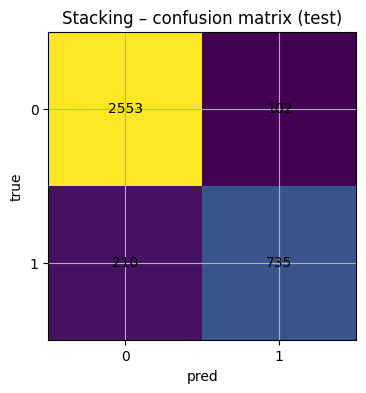

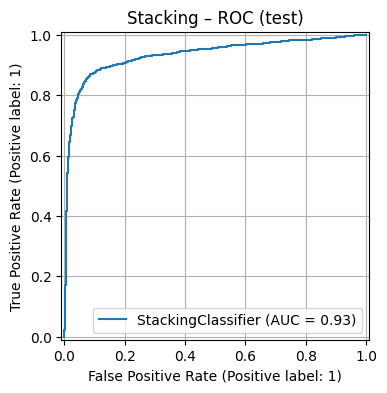

In [129]:
# Диагностика на тесте: confusion matrix и ROC-кривая.

# Confusion matrix помогает понять тип ошибок (FP/FN),
# ROC показывает качество ранжирования вероятностей по всем порогам.

y_pred = best_model.predict(X_test)
plot_confusion(y_test, y_pred, title=f"{best_label} – confusion matrix (test)")
plot_roc(best_model, X_test, y_test, title=f"{best_label} – ROC (test)")


#### 2.3.6. Интерпретация (обязательно)

Permutation importance отвечает на вопрос:

> “Если случайно перемешать один признак, насколько сильно ухудшится качество модели?”

Если качество падает сильно – признак важен. Если почти не меняется – признак малозначим (для этой модели и этой метрики).

Ограничения метода (это нормально, просто держите в голове):

- при сильной корреляции признаков важность “размазывается”;
- результат зависит от выбранной метрики (здесь `roc_auc` или `accuracy`);
- из‑за случайности (перемешивания) стоит делать несколько повторов (`n_repeats`).

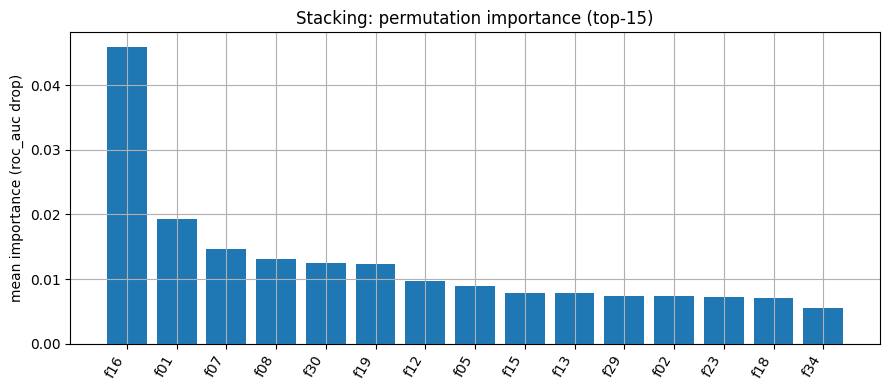

In [124]:
# Permutation importance на тесте (top-15).

# Идея: перемешиваем один признак и смотрим, насколько падает качество.
# Чем больше падение, тем “важнее” признак для модели.

feature_names = list(X_test.columns)
scoring = "roc_auc" if hasattr(best_model, "predict_proba") else "accuracy"

perm = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=8,
    random_state=RANDOM_STATE,
    scoring=scoring
)

imp = perm.importances_mean
idx = np.argsort(imp)[::-1][:15]

plt.figure(figsize=(9, 4))
plt.bar(range(len(idx)), imp[idx])
plt.xticks(range(len(idx)), [feature_names[i] for i in idx], rotation=60, ha="right")
plt.ylabel(f"mean importance ({scoring} drop)")
plt.title(f"{best_label}: permutation importance (top-15)")
plt.tight_layout()
plt.show()

In [125]:
top_features = [(feature_names[i], imp[i]) for i in idx]
for f, v in top_features:
    print(f"{f}: {v:.6f}")

f16: 0.045908
f01: 0.019233
f07: 0.014723
f08: 0.013061
f30: 0.012529
f19: 0.012355
f12: 0.009649
f05: 0.008889
f15: 0.007871
f13: 0.007869
f29: 0.007440
f02: 0.007332
f23: 0.007216
f18: 0.007067
f34: 0.005531


**Вывод:** Permutation importance (top-15) показывает, насколько падает качество модели (ROC-AUC), если случайно перемешать значения одного признака.
Наиболее важным оказался признак f16: при его перестановке качество падает сильнее всего (≈ 0.046), значит модель существенно опирается на него.
Следующая по значимости группа — f01, f07, f08, f30, f19, их вклад заметный, но существенно меньше, чем у f16.
Остальные признаки из top-15 дают более небольшое падение (≈ 0.005–0.01), то есть их влияние слабее либо частично дублируется другими признаками (корреляция признаков может “размазывать” важность).
Результат выглядит разумно: модель опирается на ограниченное число наиболее информативных признаков, а остальные дают меньший вклад.

### 2.4. Артефакты эксперимента (обязательно)

В папке `homeworks/HW06/artifacts/` должны быть:

- `metrics_test.json` (или `.csv`) – финальные метрики на test по всем моделям;
- `search_summaries.json` – лучшие параметры и CV-score для тех моделей, где был подбор;
- `best_model.joblib` – сохранённая лучшая модель;
- `best_model_meta.json` – метаданные: какая модель лучшая, какими параметрами, какие метрики на test;
- `figures/` – минимум 2 изображения (например, ROC/PR + confusion matrix или importance).

In [127]:
# Сохранение лучшей модели и метаданных.

ARTIFACTS_DIR = Path("artifacts")
FIGURES_DIR = ARTIFACTS_DIR / "figures"

ARTIFACTS_DIR.mkdir(parents=True, exist_ok=True)
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

def save_json(obj, path: Path):
    with open(path, "w", encoding="utf-8") as f:
        json.dump(obj, f, ensure_ascii=False, indent=2)
        
# metrics_test.json (или .csv) — финальные метрики на test по моделям        
metrics_df = pd.DataFrame(results)
metrics_path = ARTIFACTS_DIR / "metrics_test.csv"
metrics_df.to_csv(metrics_path, index=False)

print("Saved:", metrics_path)


# search_summaries.json — лучшие параметры и CV-score
search_path = ARTIFACTS_DIR / "search_summaries.json"
save_json(search_summaries, search_path)
print("Saved:", search_path)

# best_model.joblib — сохранённая лучшая модель
model_path = ARTIFACTS_DIR / "best_model.joblib"
joblib.dump(best_model, model_path)
print("Saved:", model_path)

#best_model_meta.json — метаданные (лучшая модель, метрики, параметры, random_state)
best_row = metrics_df[metrics_df["model"] == best_label].iloc[0]

meta = {
    "best_model_label": best_label,
    "test_metrics": best_row.to_dict(),
    "search_summary": search_summaries.get(best_label, None),
    "random_state": RANDOM_STATE
}

meta_path = ARTIFACTS_DIR / "best_model_meta.json"
save_json(meta, meta_path)

print("Saved:", meta_path)

Saved: artifacts\metrics_test.csv
Saved: artifacts\search_summaries.json
Saved: artifacts\best_model.joblib
Saved: artifacts\best_model_meta.json
